# Analysis of Housing Prices in Metropolitan Areas of India

Ссылка на датасет: https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares

In [2]:
df = pd.read_csv(r'C:\Users\aliev\Desktop\kaggle\Housing Prices in Metropolitan Areas of India\Bangalore.csv')

price = np.array(df['Price'])
area = np.array(df['Area'])

df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [3]:
print(df.shape)
df.columns

(6207, 40)


Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

### Dependence of the price on area

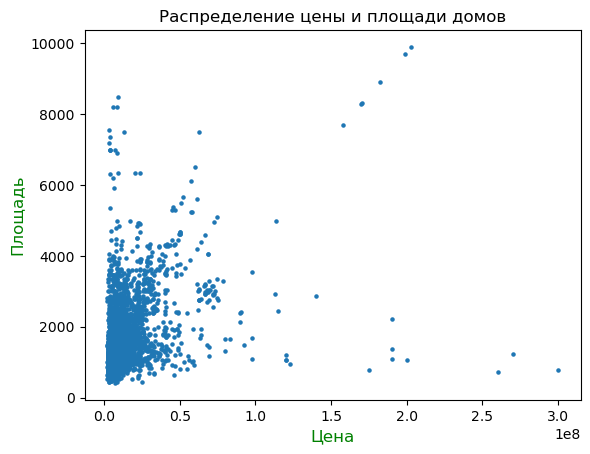

0.39762594885588143 - коэффицент корреляции площади и цены 

7368000.0 рупий - медиана цены 
1340.0 - медиана площади 



In [4]:
plt.scatter(price, area, s=5)
plt.title('Распределение цены и площади домов')
plt.xlabel('Цена', fontsize=12, color='green')
plt.ylabel('Площадь', fontsize=12, color='green')
plt.show()


low_prices = price < 0.5*10**8
prices_below_mean = price < np.mean(price)


low_area = area < 4000
area_below_mean = area < np.mean(area)


print(f'{np.corrcoef(price, area)[1][0]} - коэффицент корреляции площади и цены \n')

print(f'{np.median(price)} рупий - медиана цены ')
print(f'{np.median(area)} - медиана площади \n')

#print(f'{len(price[prices_below_mean])/len(price)*100}% домов стоят меньше среднего арифметического')
#print(f'{len(area[area_below_mean])/len(area)*100}% домов имеют площадь меньше среднего арифметического \n')

#print(f'{len(price[low_prices])/len(price)*100}% домов стоят меньше 0.5*10^8 рупий')
#print(f'{len(area[low_area])/len(area)*100}% домов имеют площадь меньше 4000')

**Факты:**  
__0.398__ - коэффициент корреляции Пирсона

__10585105__ рупий - среднее арифметическое цены

__1526.1__ - среднее арифметическое площади

__74.51%__ - у стольких домов цена меньше среднего арифметического (характерно для развивающихся стран)

__67.65%__ - такой процент домов имеют площадь меньше средней площади

__98.31%__ домов стоят меньше 50 млн рупий

__98.52%__ домов имеют площадь меньше 4000



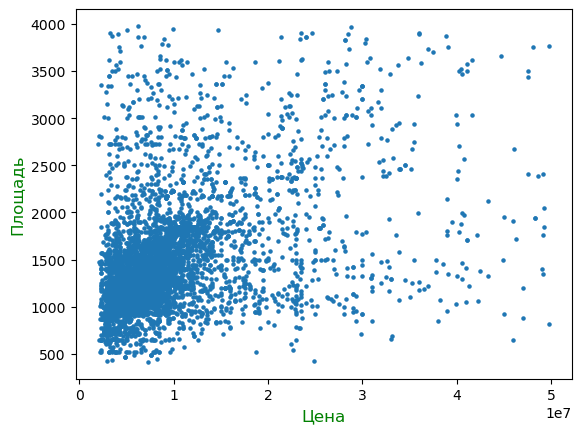

0.4260488890500042 - коэффициент корреляции площади и цены 



In [5]:
price_rectangle = price[(price < 0.5*10**8) * (area < 4000)]
area_rectangle = area[(price < 0.5*10**8) * (area < 4000)]


plt.scatter(price_rectangle, area_rectangle, s=5)
plt.xlabel('Цена', fontsize=12, color='green')
plt.ylabel('Площадь', fontsize=12, color='green')
plt.show()

print(f'{np.corrcoef(price_rectangle, area_rectangle)[1][0]} - коэффициент корреляции площади и цены \n')

После того, как мы ограничили цену и площадь до прямоугольника со сторонами 4000 и 5*10^7, мы построили график и посчитали коэффицент корреляции, равный 0.426. Линейная взаимосвязь выросла, но *незначительно*. Версия, что "вырожденные" крайние значения существенно влияют на взаимосвязь цены и площади __неверна__. 

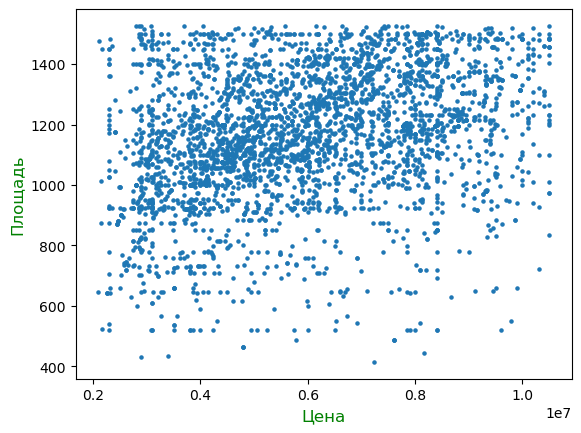

0.32014297310609235 - коэффицент корреляции площади и цены 



In [6]:
price_rectangle_mean = price[(price < np.mean(price)) * (area < np.mean(area))]
area_rectangle_mean = area[(price < np.mean(price)) * (area < np.mean(area))]


plt.scatter(price_rectangle_mean, area_rectangle_mean, s=5)
plt.xlabel('Цена', fontsize=12, color='green')
plt.ylabel('Площадь', fontsize=12, color='green')
plt.show()

print(f'{np.corrcoef(price_rectangle_mean, area_rectangle_mean)[1][0]} - коэффицент корреляции площади и цены \n')

Теперь при ограничении на прямоугольник со сторонами, равными средним арифметическим цены и площади, мы посчитали коэффициент корреляции, равный 0.32, т.е. линейная взаимосвязь даже меньше, чем вообще __без ограничений__.


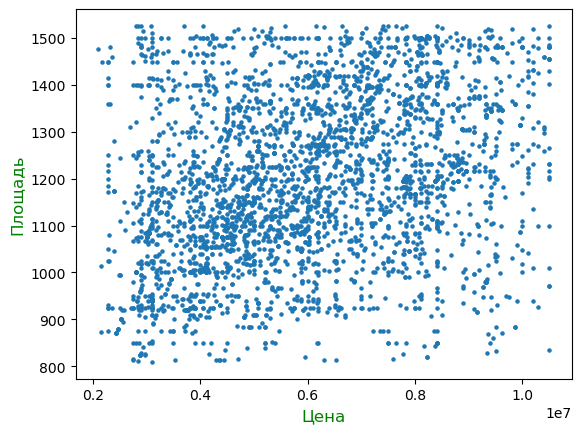

0.31363463322874013 - коэффицент корреляции площади и цены 



In [7]:
price_rectangle_mean1 = price[(price < np.mean(price)) * (area < np.mean(area))*(800 < area)]
area_rectangle_mean1 = area[(price < np.mean(price)) * (area < np.mean(area))*(800 < area)]

plt.scatter(price_rectangle_mean1, area_rectangle_mean1, s=5)
plt.xlabel('Цена', fontsize=12, color='green')
plt.ylabel('Площадь', fontsize=12, color='green')
plt.show()

print(f'{np.corrcoef(price_rectangle_mean1, area_rectangle_mean1)[1][0]} - коэффицент корреляции площади и цены \n')

Еще выкинув из предыдущего случая дома с низкой площадью, мы снова посчитали коэффициент корреляции, и он снова низким.

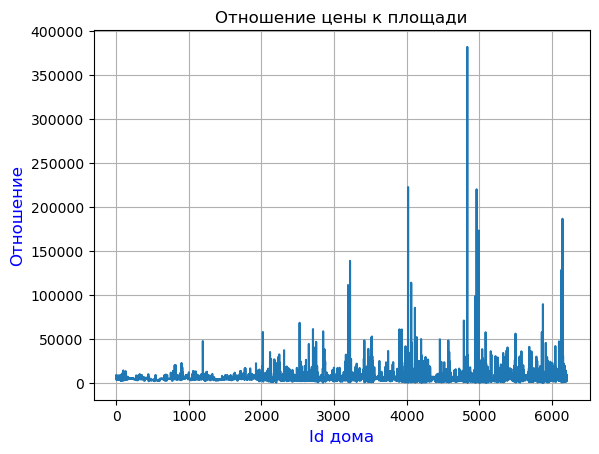

Максимальное отношение: 382165.6050955414
Минимальное отношение: 432.30340803606947
Медиана: 5371.786833855799
Среднее арифметическое: 7073.5717827623475


In [149]:
%matplotlib inline
ratio = np.array(price / area)


plt.plot(ratio)
plt.grid()
plt.title('Отношение цены к площади')
plt.xlabel('Id дома', fontsize=12, color='blue')
plt.ylabel('Отношение', fontsize=12, color='blue')
plt.show()


print('Максимальное отношение:', max(ratio))
print('Минимальное отношение:', min(ratio))

print('Медиана:', np.median(ratio))
print('Среднее арифметическое:', np.mean(ratio))

### Dependence of the price on No. of Bedrooms

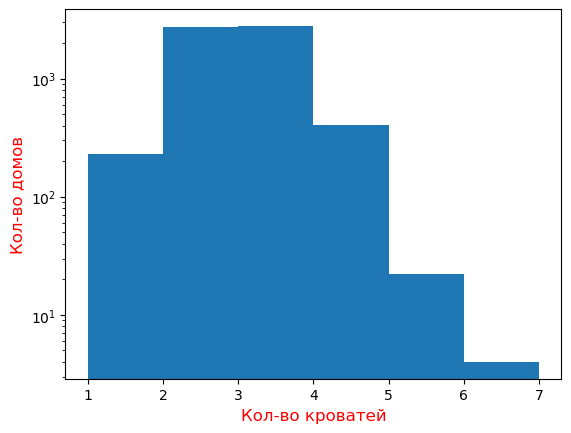

In [150]:
plt.hist(df['No. of Bedrooms'], bins = np.arange(min(df['No. of Bedrooms']), max(df['No. of Bedrooms']) + 1, 1), log = True)
plt.ylabel('Кол-во домов', fontsize=12, color='red')
plt.xlabel('Кол-во кроватей',fontsize=12, color='red')
plt.show()

Многокроватных домов мало, больше всего 2-3-кроватных домов

In [151]:
bedrooms = np.array(df['No. of Bedrooms'])
bedrooms_arr = []
tmp = []



for i in range(7):    
    bedrooms_arr.append(price[bedrooms == i+1] / bedrooms[bedrooms == i+1])
    tmp.append(np.arange(1, len(bedrooms_arr[i])+1))

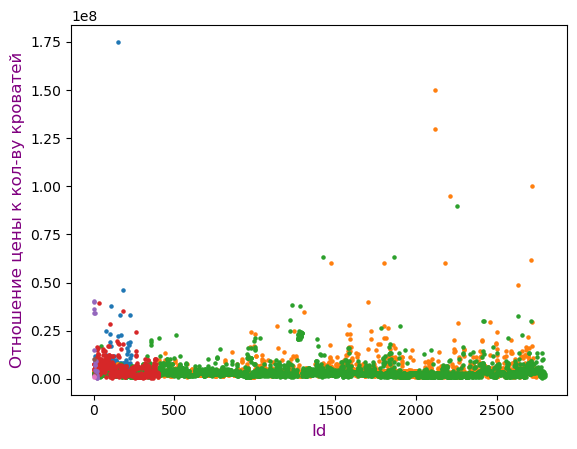

In [152]:
plt.scatter(tmp[0], bedrooms_arr[0], s = 5)
plt.scatter(tmp[1], bedrooms_arr[1], s = 5)
plt.scatter(tmp[2], bedrooms_arr[2], s = 5)
plt.scatter(tmp[3], bedrooms_arr[3], s = 5)
plt.scatter(tmp[4], bedrooms_arr[4], s = 5)
plt.scatter(tmp[5], bedrooms_arr[5], s = 5)
plt.scatter(tmp[6], bedrooms_arr[6], s = 5)


plt.ylabel('Отношение цены к кол-ву кроватей', fontsize=12, color='purple')
plt.xlabel('Id',fontsize=12, color='purple')
plt.show()

In [165]:
for i in range(7):
    print(f'Среднее арифм. отн-я цен к кол-ву кроватей равно {round(np.mean(bedrooms_arr[i]), 3)}, где кол-во кроватей равно {i+1}')

Среднее арифм. отн-я цен к кол-ву кроватей равно 7633599.943, где кол-во кроватей равно 1
Среднее арифм. отн-я цен к кол-ву кроватей равно 4109588.521, где кол-во кроватей равно 2
Среднее арифм. отн-я цен к кол-ву кроватей равно 3764309.971, где кол-во кроватей равно 3
Среднее арифм. отн-я цен к кол-ву кроватей равно 5178435.929, где кол-во кроватей равно 4
Среднее арифм. отн-я цен к кол-ву кроватей равно 11966718.173, где кол-во кроватей равно 5
Среднее арифм. отн-я цен к кол-ву кроватей равно 6358333.333, где кол-во кроватей равно 6
Среднее арифм. отн-я цен к кол-ву кроватей равно 1057571.429, где кол-во кроватей равно 7


In [166]:
print(f'Среднее арифм. отн-я цен к кол-ву кроватей (все данные) равно {round(np.mean(price / bedrooms), 3)}')

Среднее арифм. отн-я цен к кол-ву кроватей (все данные) равно 4181284.176


In [155]:
#print(np.mean(price / bedrooms)/np.mean(bedrooms_arr[1]))

print(f'Средняя цена двухкроватных домов {np.mean(price[bedrooms == 2])}')
print(f'Средняя цена всех домов {np.mean(price)}')
print(f'Средняя площадь двухкроватных домов {np.mean(area[bedrooms == 2])}')
print(f'Средняя площадь всех домов {np.mean(area)}')

Средняя цена двухкроватных домов 8219177.042909091
Средняя цена всех домов 10585104.825519575
Средняя площадь двухкроватных домов 1133.9243636363635
Средняя площадь всех домов 1526.094248429193


Среднее отношение цены к кол-ву кроватей близко к отношению цены к 2 (в двухкроватных домах), однако нельзя сказать, что выборка 2-кроватных домов похожа на общую: площади и цены в таких домах непропорционально ниже, чем в общем.

### Dependence of the price on school

In [156]:
sch = np.array(df['School'])
location = np.array(df['Location'])
location_set = set(location)
price_0 = price[sch == 0]
price_1 = price[sch == 1]
price_9 = price[sch == 9]


#print(len(set(location[sch == 1])))
#print(len(set(location)))



#print(np.mean(price_0))
#print(np.mean(price_1))
#print(np.mean(price_9))

ratio_sch = np.mean(price_1)/(np.mean(price_0))
print(ratio_sch)

0.7167589170880885


Цена домов, где рядом нет школы, в среднем __выше (!)__ на 39.5 процентов, чем цены домов, рядом с которыми есть школы. Это контринтуитивное утверждение может объясняться либо маленькой выборкой домов со школами, либо тем, что в развивающихся странах ценность школы меньше, чем ценность (например) офиса (и потенциального работодателя). Попробуем, сохранив пропорцию, определить приблизительное кол-во школ там, где это не указано.

In [167]:
special_location = location[[True if loc in location[sch == 1] else False for loc in location]]

price_location1 = price[[True if loc in location[sch == 1] else False for loc in location]*(sch == 1)]
price_location0 = price[[True if loc in location[sch == 1] else False for loc in location]*(sch == 0)]
price_location9 = price[[True if loc in location[sch == 1] else False for loc in location]*(sch == 9)]

#print(np.mean(price_location1))
#print(np.mean(price_location0))
#print(np.mean(price_location9))

ratio_sch_location = np.mean(price_location1)/(np.mean(price_location0))
#print(ratio_sch_location)
tmp_loc1 = round(len(price_location9)*len(price_location1)/(len(price_location1)+len(price_location0)))
tmp_loc0 = 363+230 - round(len(price_location9)*len(price_location1)/(len(price_location1)+len(price_location0)))

#print(len(price_location1))
#print(len(price_location0))
print(f'Мы прогнозируем, что около {tmp_loc1} домов из этих районов будут иметь школу.')
print(f'Мы прогнозируем, что около {tmp_loc0} домов из этих районов НЕ будут иметь школу.')

Мы прогнозируем, что около 266 домов из этих районов будут иметь школу.
Мы прогнозируем, что около 327 домов из этих районов НЕ будут иметь школу.


Даже ограничив выборку на районы, где точно есть школы, мы получаем, что дома без школы стоят на __73.2%__ дороже (а кол-во домов со школой и без сопоставимы). Средняя цена домов со школами на ограниченной выборке на 43% меньше, чем домов без школ (причем в выборке без ограничения районов разница меньше).

In [168]:
tmp_1 = round(len(price)*len(price_location1)/(len(price_location1)+len(price_location0)))
tmp_0 = len(price)-1 - round(len(price_location9)*len(price_location1)/(len(price_location1)+len(price_location0)))


print(f'Мы прогнозируем, что около {tmp_1} домов из ВСЕХ районов будут иметь школу.')
print(f'Мы прогнозируем, что около {tmp_0} домов из ВСЕХ районов НЕ будут иметь школу.')

Мы прогнозируем, что около 2407 домов из ВСЕХ районов будут иметь школу.
Мы прогнозируем, что около 5940 домов из ВСЕХ районов НЕ будут иметь школу.


Мы расширили пропорцию до всех домов. Тем не менее, такая модель не вызывает доверия, т.к. выборка со школами охватывает меньше 5 процентов всех районов.